In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys
sys.path.insert(0, '../source')

In [2]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 14.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 KB 19.7 MB/s eta 0:00:00


In [7]:
import numpy as np
from constitutive import  D, Phi, dPhi
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from params import alpha, z_f, N_sc
import sympy as sp

In [8]:
# phi = np.linspace(0.1,0.9,1000)
N = np.linspace(1e-2,20,1000)

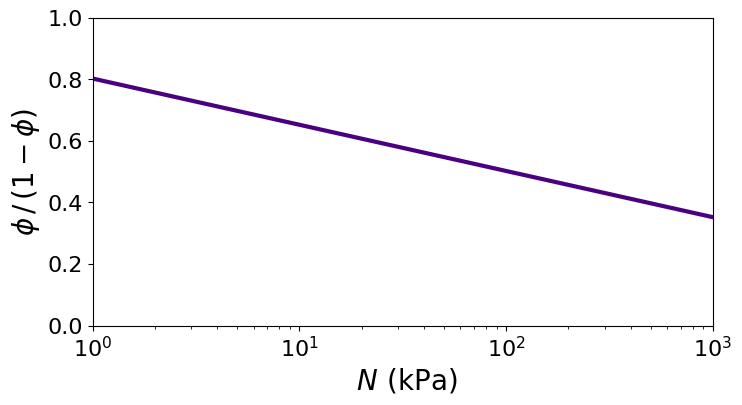

In [9]:
phi = Phi(N,log=np.log)
e = phi/(1-phi)

plt.figure(figsize=(8,4))
plt.plot(N*N_sc/1e3,e,linewidth=3,color='indigo')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\phi\,/\,(1-\phi)$',fontsize=20)
plt.xlabel(r' $N$ (kPa)',fontsize=20)
plt.xlim(1e0,1e3)
plt.ylim(0,1)
plt.gca().set_xscale('log')
plt.show()

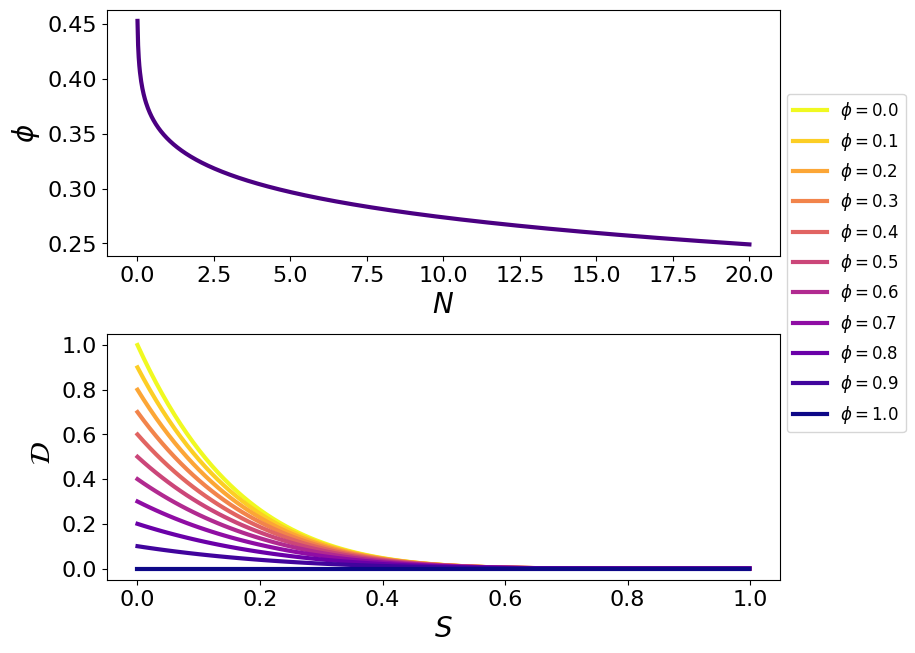

In [10]:
S = np.linspace(0,0.999,100)
phi_i = np.arange(0,1.1,0.1)
colors = pl.cm.plasma_r(phi_i)

plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(N,phi,linewidth=3,color='indigo')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$N$',fontsize=20)
plt.ylabel(r'$\phi$',fontsize=20)
# plt.ylim(0,10)
plt.tight_layout()


plt.subplot(212)
for i in range(phi_i.size):
    plt.plot(S,D(phi_i[i],S,eps=1e-7),linewidth=3,color=colors[i],label=r'$\phi=$'+'{:.1f}'.format(phi_i[i]))
# plt.gca().set_yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$S$',fontsize=20)
plt.ylabel(r' $\mathcal{D}$',fontsize=20)
plt.legend(fontsize=12,loc=(1.01,0.6))

plt.show()

In [11]:
N_s = sp.Symbol('N',real=True)
alpha_s = sp.Symbol('alpha',real=True)
d0_s = sp.Symbol('d0',real=True)
e0_s = sp.Symbol('e0',real=True)
l10 = sp.Symbol('np.log(10)',real=True)

p = e0_s - d0_s*sp.log(N_s/alpha_s)/l10

Phi_s = p/(p+1)
Phi_N = sp.diff(Phi_s,N_s)

# derivative of phi w.r.t. N
# compute symbolically with sympy then convert to numpy-friendly function
dPhi = sp.lambdify(N_s,sp.diff(-Phi(N_s,log=lambda x: sp.log(x)),N_s),'numpy')

In [12]:
print(sp.simplify(-Phi_N))

d0*np.log(10)/(N*(-d0*log(N/alpha) + np.log(10)*(e0 + 1))**2)


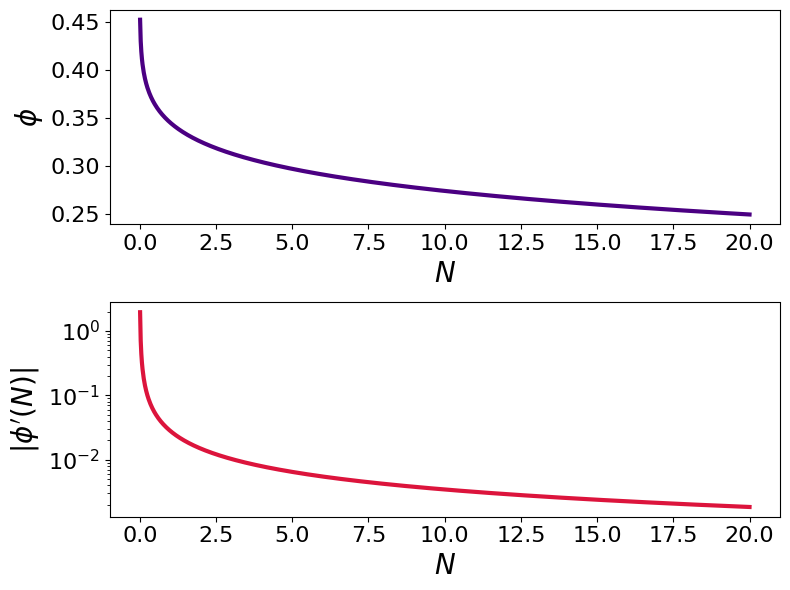

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(N,Phi(N,log=np.log),linewidth=3,color='indigo')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\phi$',fontsize=20)
plt.xlabel(r'$N$',fontsize=20)

plt.subplot(212)
plt.plot(N,dPhi(N),linewidth=3,color='crimson')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().set_yscale('log')
plt.ylabel(r'$|\phi^\prime(N)|$',fontsize=20)
plt.xlabel(r'$N$',fontsize=20)
plt.tight_layout()
plt.show()